In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('insurance.xlsx')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
#df = pd.get_dummies(df,drop_first='True')
df = pd.get_dummies(df, drop_first=True).astype(int)


In [10]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [11]:
df.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.169656,1.094918,13269.928999,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.119875,1.205493,12110.012755,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.000000,0.000000,1121.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.000000,0.000000,4740.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.000000,1.000000,9381.500000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.000000,2.000000,16639.250000,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.000000,5.000000,63770.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0,27.0,39.0,51.00,64.0
bmi,1338.0,30.169656,6.119875,15.0,26.0,30.0,34.00,53.0
children,1338.0,1.094918,1.205493,0.0,0.0,1.0,2.00,5.0
charges,1338.0,13269.928999,12110.012755,1121.0,4740.0,9381.5,16639.25,63770.0
sex_male,1338.0,0.505232,0.500160,0.0,0.0,1.0,1.00,1.0
smoker_yes,1338.0,0.204783,0.403694,0.0,0.0,0.0,0.00,1.0
region_northwest,1338.0,0.242900,0.428995,0.0,0.0,0.0,0.00,1.0
region_southeast,1338.0,0.272048,0.445181,0.0,0.0,0.0,1.00,1.0
region_southwest,1338.0,0.242900,0.428995,0.0,0.0,0.0,0.00,1.0


# Data Visualization

<Figure size 1200x1200 with 0 Axes>

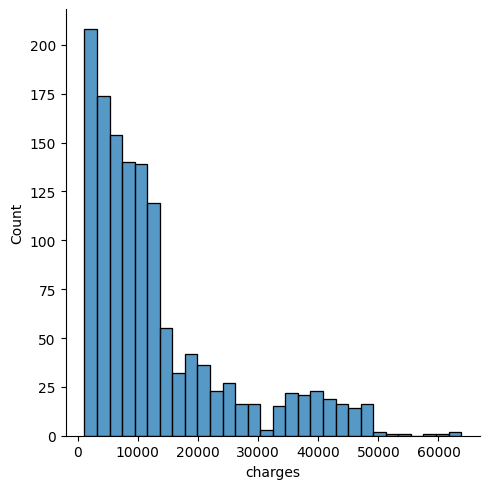

In [13]:
plt.figure(figsize=(12,12))
sns.displot(df['charges'])

<Axes: >

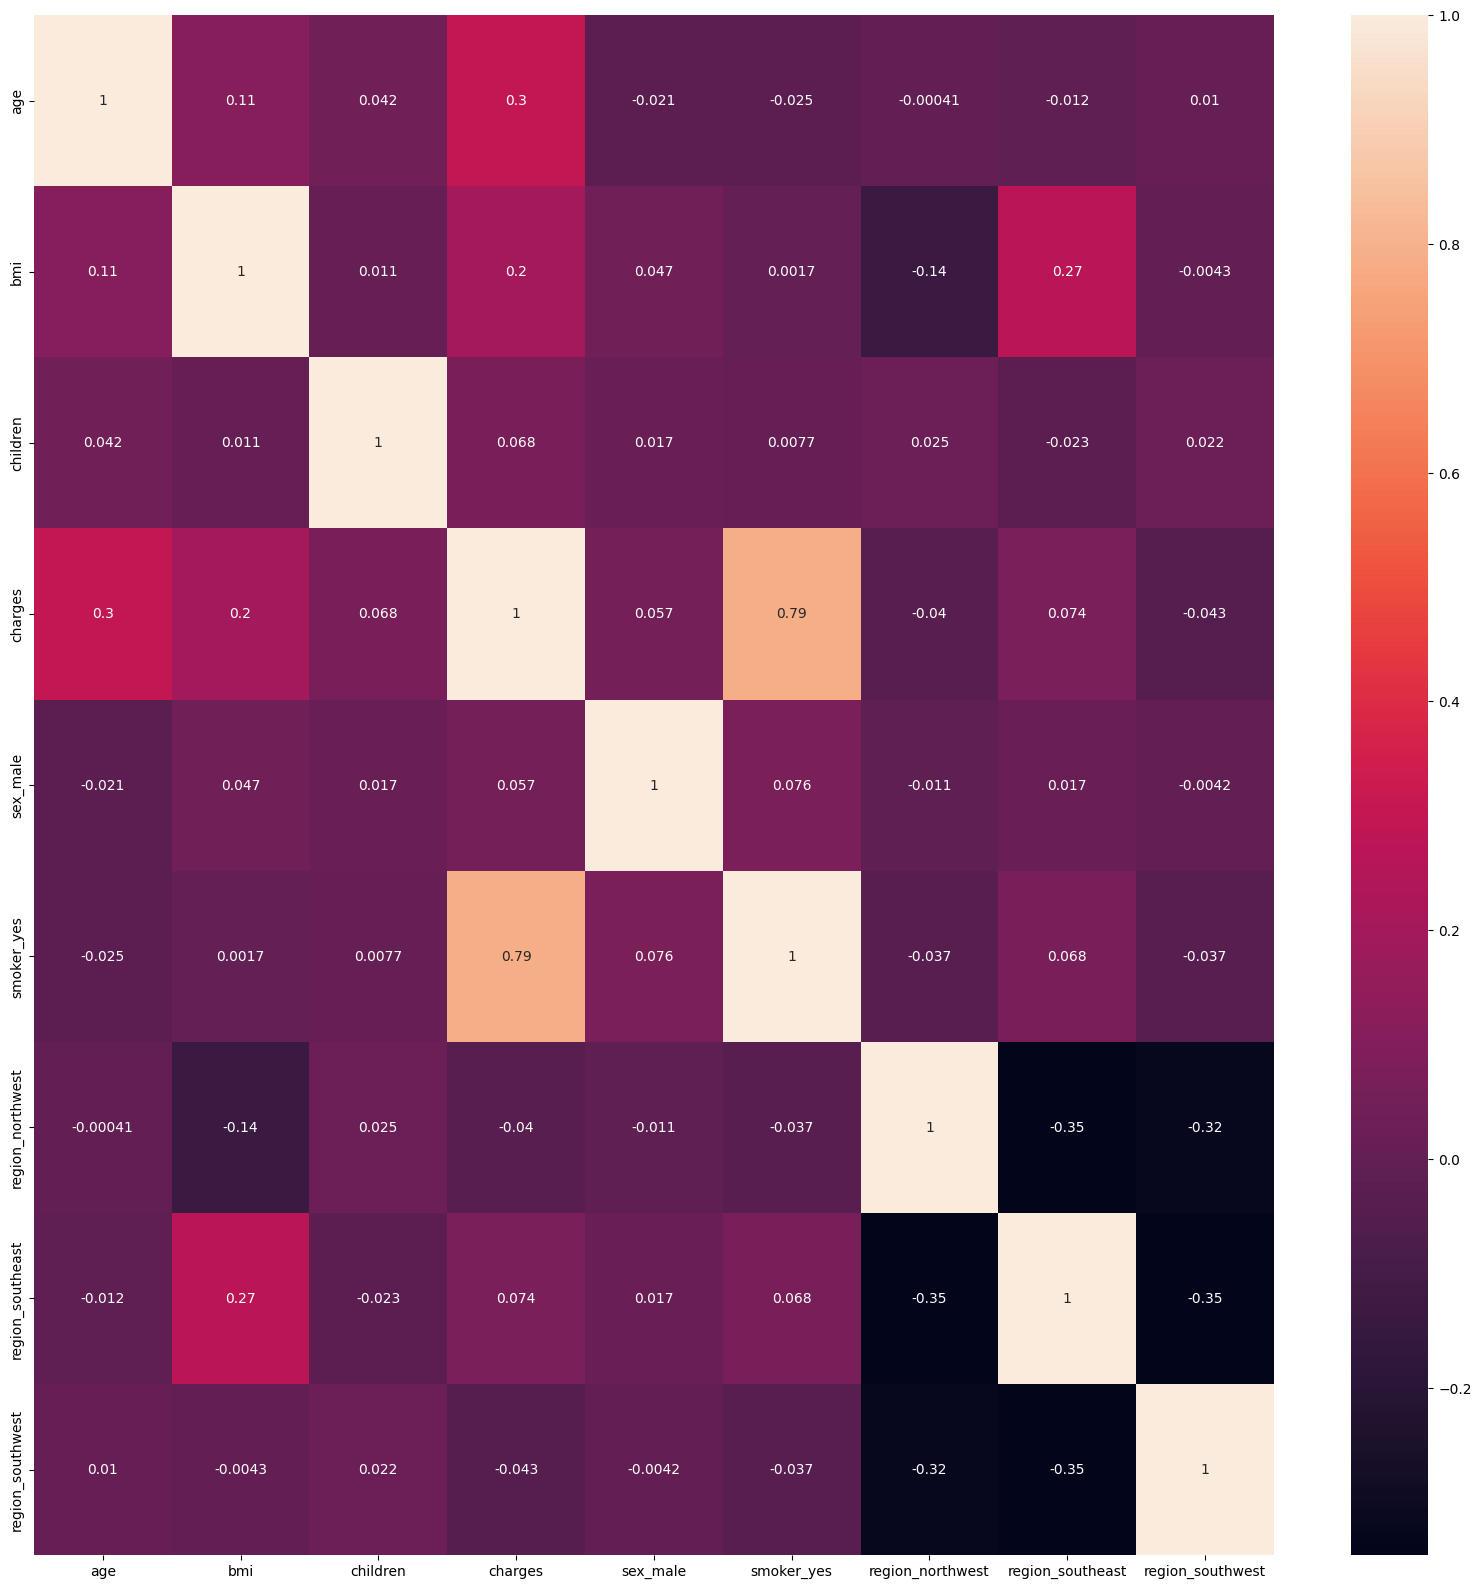

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [15]:
x = df.drop('charges',axis=1)
y = df['charges']

In [16]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=78)

In [17]:
xtrain.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
62,64,24,1,1,0,1,0,0
861,38,28,3,0,0,0,0,1
973,19,40,0,0,0,0,0,1
209,40,41,1,1,0,0,0,0
849,55,32,0,1,0,1,0,0


In [18]:
ytrain.head()

62     30166
861     7151
973     1759
209     6610
849    10601
Name: charges, dtype: int32

In [19]:
xtest.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
160,42,26,0,0,1,1,0,0
1326,42,32,0,0,0,0,0,0
544,54,30,0,1,0,1,0,0
624,59,28,0,1,0,1,0,0
914,33,24,2,1,0,1,0,0


In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [21]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [22]:
pred = reg.predict(xtest)
pred

array([31778.30775701,  9922.72179583, 11911.91022321, 12550.05776367,
        5269.26475863, 14956.37145788,  7000.07725648,  9906.28272201,
       31587.20379237, 35745.39855955,  7877.40277983, 10319.86498212,
        3323.44783882, 10027.44856168, 35972.50637242,  5749.40356481,
        7086.8590348 , 30734.83490394, 29323.5372536 , 34460.10908492,
       14996.21240023, 11426.97545119,  3962.05089451,  1749.67304713,
        9030.53345465, 31304.9534421 , 30128.74362544,  2757.37591899,
       10489.24923089, 29955.31228713,  3271.08193754,  8209.34352422,
        3136.27470855, 15254.08956875, 31136.6848974 , 10573.95570711,
        3259.28940202, 11717.82494882,   540.71258197, 13936.03773043,
         295.36037238,  8737.71749138,  9501.87777304, 27810.67941418,
       13360.58330415,  6182.55059932,  7594.54720169, 13901.62185339,
        2795.84527896, 25706.94748424,  4921.723279  ,  4045.44176075,
        9178.32115779,  8444.6408821 ,  -725.42887029,  7303.15806687,
      

In [23]:
df_pred = pd.DataFrame({'Actual': ytest, 'Prediction': pred, 'Difference': abs(ytest-pred)})
df_pred.head()

,Actual,Prediction,Difference
160,21348,31778.307757,10430.307757
1326,7050,9922.721796,2872.721796
544,10231,11911.910223,1680.910223
624,12129,12550.057764,421.057764
914,5257,5269.264759,12.264759


In [24]:
m = reg.coef_
m

array([  263.80127993,   340.42942959,   469.87899576,    52.36590128,
       24446.09651262,  -547.93397387, -1188.44112942, -1205.48514601])

In [25]:
c = reg.intercept_
c

-12050.673708265173

In [26]:
reg.score(xtest,ytest)

0.7213754975609934